# Median correction of the NSAF data table

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

In [2]:
nsaf = pd.read_hdf("../Atlas_creation/proteome_nsaf_pooled_3.h5")
nsaf = nsaf.pivot(index = "assay_id", columns = "uniprot_id", values = "NSAF")

meta = pd.read_csv("../Metadata/unified_metadata.csv", index_col="assay_id")
meta = meta[meta.index.isin(nsaf.index)]

In [3]:
hela_assays = meta[meta.cell_line == "HeLa"].index

In [4]:
hela_nsaf = nsaf.loc[hela_assays,:]
hela_meta = meta[meta.index.isin(hela_assays)]

In [5]:
hela_nsaf

uniprot_id,A0A024RBG1,A0A075B6X5,A0A075B767,A0A087WV62,A0A087X0K7,A0A096LP01,A0A096LP49,A0A096LP55,A0A0A6YYK6,A0A0A6YYK7,...,Q9Y6X5,Q9Y6X8,Q9Y6X9,Q9Y6Y0,Q9Y6Y1,Q9Y6Y8,Q9Y6Y9,Q9Y6Z5,Q9Y6Z7,W5XKT8
assay_id,,,,,,,,,,,,,,,,,,,,,
32546,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000094,NaN,NaN,...,NaN,0.000086,0.000157,0.000288,NaN,0.000260,NaN,NaN,0.000038,NaN
32616,0.000016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000071,0.000149,0.000249,0.000002,0.000222,NaN,NaN,NaN,NaN
32662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000143,0.000115,NaN,0.000074,NaN,NaN,NaN,NaN
34740,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000139,NaN,NaN,NaN,NaN
34748,NaN,NaN,0.000021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000075,0.000085,0.000169,NaN,0.000330,NaN,NaN,0.000051,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000070,NaN,NaN,...,NaN,NaN,0.000093,0.000110,NaN,0.000109,NaN,NaN,NaN,NaN
34371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000017,0.000055,0.000030,NaN,0.000172,NaN,NaN,NaN,NaN
34377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000018,0.000062,0.000085,NaN,0.000173,NaN,NaN,NaN,NaN


In [6]:
lut = {}
for x in hela_meta.PXD_accession.unique():
    lut[x] = sns.color_palette("deep")[len(lut)]


drop 32662, 34740?

In [7]:
hela_nsaf = hela_nsaf.loc[~hela_nsaf.index.isin([32662,34740]),:]
hela_meta = hela_meta.loc[~hela_meta.index.isin([32662,34740]),:]

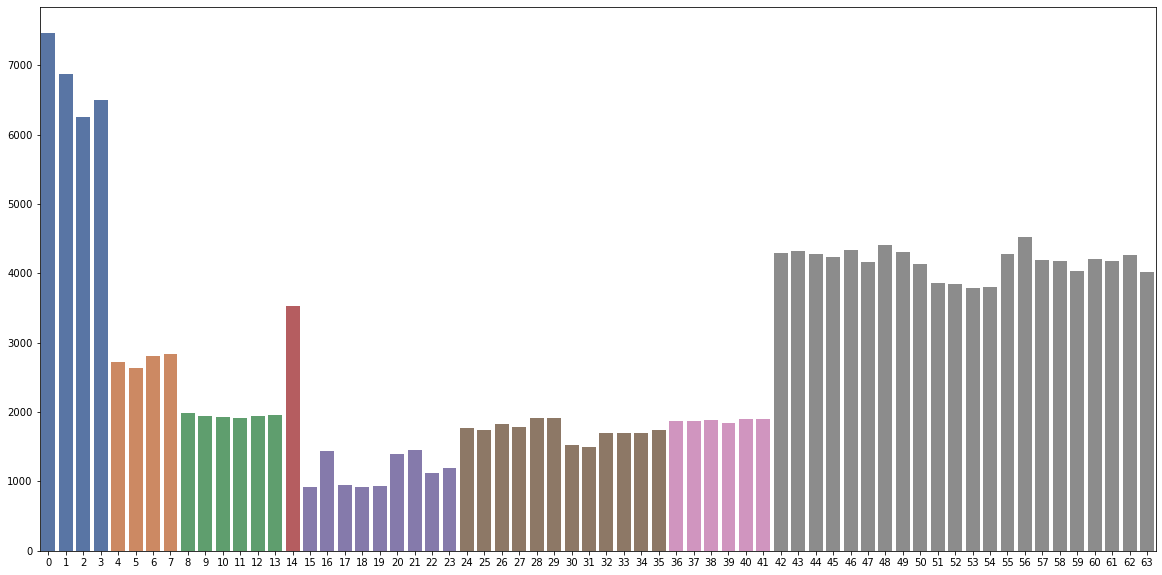

In [8]:
plt.figure(figsize=(20,10))

cols = hela_meta.PXD_accession.apply(lambda x: lut[x])

sns.barplot(x=list(range(len(hela_nsaf))), y=hela_nsaf.notna().sum(axis=1), palette=cols)

In [31]:
logged_hela_nsaf = np.log2(hela_nsaf)

In [9]:
import AtlasAnalysisFunctions as AAF

reoccurring, deleted = AAF._identify_global_reoccured_proteins(hela_nsaf.fillna(0), .7)

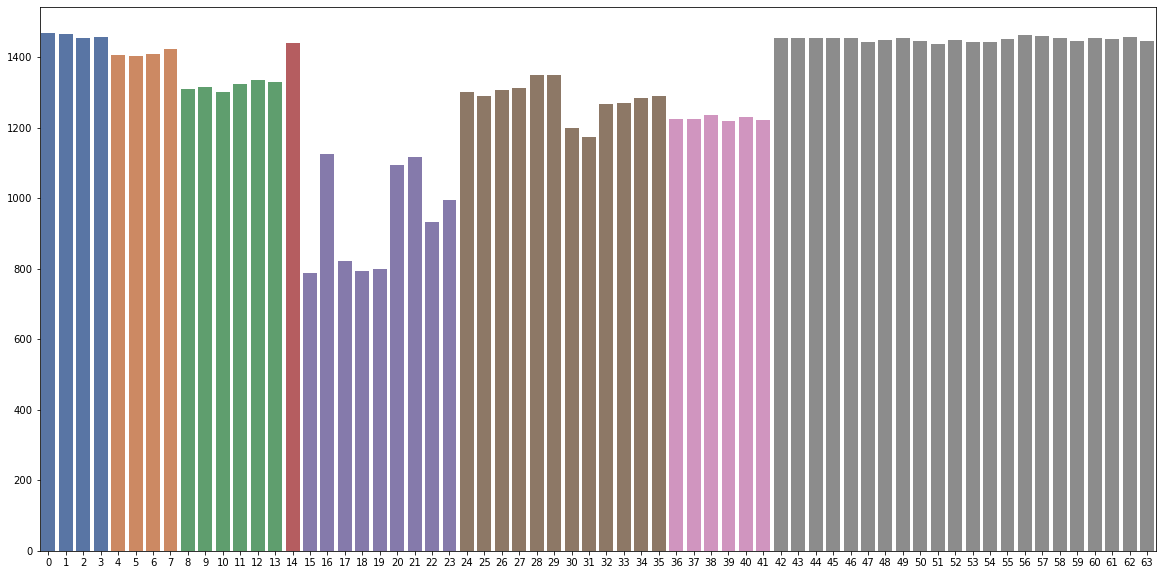

In [33]:
filtered_hela_nsaf = hela_nsaf.loc[:,reoccurring]
filtered_log_hela_nsaf = logged_hela_nsaf.loc[:,reoccurring]

plt.figure(figsize=(20,10))

sns.barplot(x=list(range(len(hela_nsaf))), y=filtered_hela_nsaf.notna().sum(axis=1), palette=cols)

In [11]:
hela_meta.PXD_accession.unique()

array(['PXD004452', 'PXD004182', 'PXD004940', 'PXD001441', 'PXD003530',
       'PXD006112', 'PXD004900', 'PXD000612'], dtype=object)

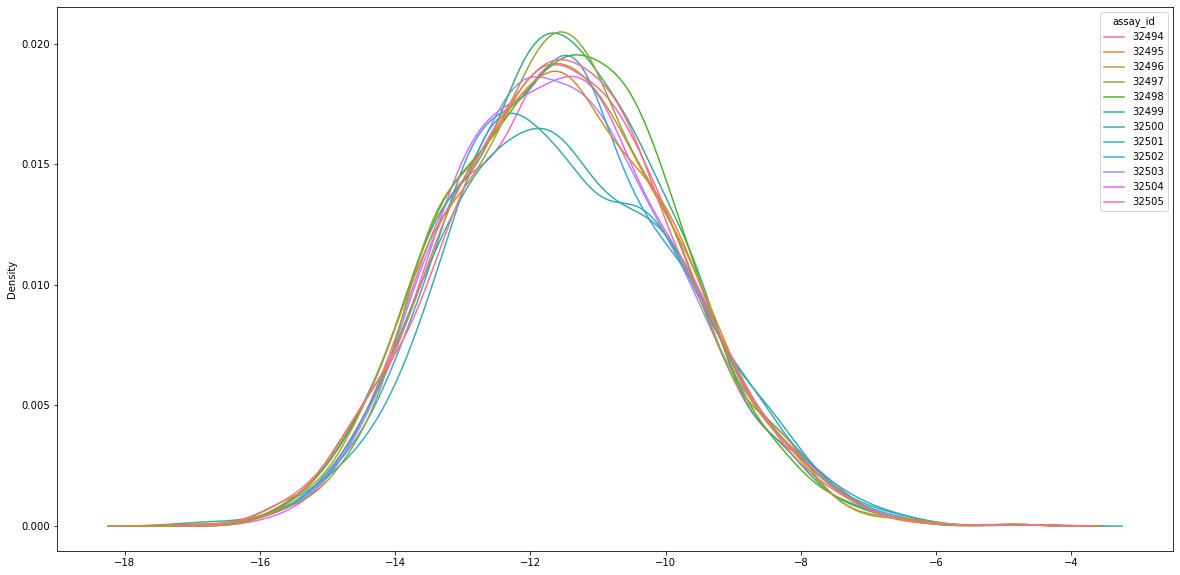

In [28]:
# Plotting the abundance values
plt.figure(figsize=(20,10))
sns.kdeplot(data=np.log2(filtered_hela_nsaf.loc[hela_meta[hela_meta.PXD_accession == "PXD006112"].index,:]).transpose())

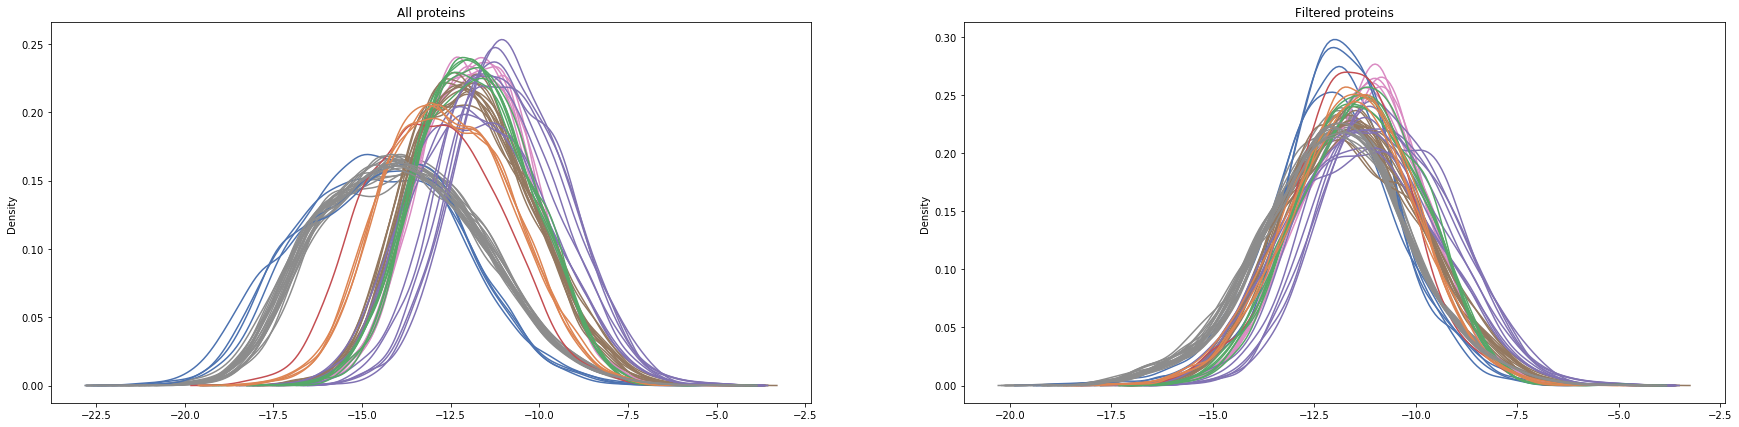

In [61]:
# Plotting the abundance values of the full and the filtered dataset
fig, ax = plt.subplots(1,2,figsize=(30,7))

ax[0].set_title('All proteins')
sns.kdeplot(data=logged_hela_nsaf.transpose(), palette = list(hela_meta.PXD_accession.apply(lambda x: lut[x]).sort_index()), legend = False, common_norm=False, ax =ax[0])

ax[1].set_title("Filtered proteins")
sns.kdeplot(data=filtered_log_hela_nsaf.transpose(), palette = list(hela_meta.PXD_accession.apply(lambda x: lut[x]).sort_index()), legend = False, common_norm=False, ax =ax[1])

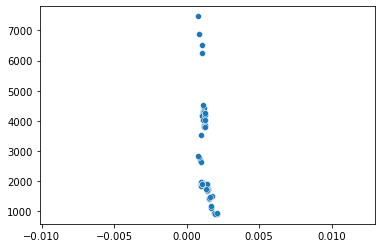

In [35]:
sns.scatterplot(x=filtered_hela_nsaf.iloc[:,:].transpose().std(), y=list(hela_nsaf.notna().sum(axis=1)))

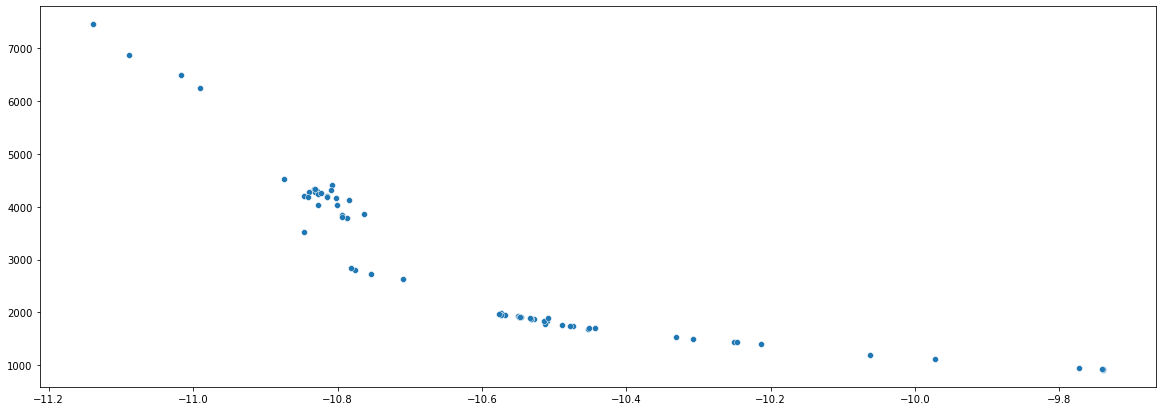

In [36]:
plt.figure(figsize=(20,7))
sns.scatterplot(x=np.log2(list(filtered_hela_nsaf.iloc[:,:].mean(axis=1))), y=list(hela_nsaf.notna().sum(axis=1)))

In [38]:
def get_fc_plot(sample1, sample2, index):
    '''returns list of fold changes of protein abundance between the 2 samples'''
    log_fc = []

    count = 0
    for i in range(len(sample1)):
        if sample1[i] != 0.0 and sample2[i] != 0.0:
            log_fc.append(np.log(sample1[i] / sample2[i]))
            count += 1
    
    print(f"{index}:\tcommon prots: {count}\tmedianFC: {np.median(log_fc)}\tstdFC: {np.std(log_fc)}")
    return log_fc

def plot_fc(subset, ref = None, plot_med_fc = False, color_scheme = None):
    """ref = index of the reference sample, default is first sample"""
    full_df = pd.DataFrame(data = {"fold_change":{}, "index":{}})
    if ref == None:
        ref = subset.loc[subset.index[0],:]
        ref_i = ref.name
    else:
        ref = subset.loc[ref,:]
        ref_i = ref.name

    list_med_fc = []
    indices = []
    for index, row in subset.iterrows():
        if index == ref_i:
            continue
        
        fc_list = get_fc_plot(ref, row, index)
        list_med_fc.append(np.median(fc_list))
        indices.append(index)
        df = pd.DataFrame({"fold_change": fc_list})
       
        df["index"] = index
        full_df = pd.concat([full_df, df], ignore_index = True)

    if plot_med_fc:
        fig, (ax1, ax2) = plt.subplots(1,2,figsize = (25,8))
        
        ax1.set_xlim(right= 2, left = -2)    
        ax1.set_title("Fold changes")
        ax2.set_title("median fold changes")
        if color_scheme != None:
            sns.kdeplot(data=full_df, x = "fold_change", hue = "index", palette = color_scheme, common_norm = False, alpha = .8, ax = ax1, legend = False)
            sns.barplot(x = indices, y = list_med_fc, ax = ax2, palette = color_scheme,  alpha = .8)
        
        else:
            sns.kdeplot(data=full_df, x = "fold_change", hue = "index", palette = "tab10", common_norm = False, alpha = .8, ax = ax1, legend = False)
            sns.barplot(x = indices, y = list_med_fc, ax = ax2, palette = "tab10",  alpha = .8)
        return
        
    plt.xlim(right= 2, left = -2)    
    sns.kdeplot(data=full_df, x = "fold_change", hue = "index", palette = "tab10", common_norm = False, alpha = .5, legend = False)

32546:	common prots: 1440	medianFC: 0.1812422808852232	stdFC: 0.6462659125912251
32616:	common prots: 1437	medianFC: 0.1943711173074251	stdFC: 0.6605388173412713
34748:	common prots: 1428	medianFC: 0.2561035523598183	stdFC: 0.827138708208917
34786:	common prots: 1435	medianFC: 0.19090651461343672	stdFC: 0.6996003712539893
32355:	common prots: 1383	medianFC: -0.009583368024380949	stdFC: 0.6757305971269729
32356:	common prots: 1381	medianFC: -0.0005096289737997437	stdFC: 0.6689411350413323
32357:	common prots: 1388	medianFC: -0.016997319235568544	stdFC: 0.6501987372914839
32358:	common prots: 1403	medianFC: -0.025866562325485846	stdFC: 0.6332293704480445
32374:	common prots: 1288	medianFC: -0.11089099506712621	stdFC: 0.75594561688425
32375:	common prots: 1291	medianFC: -0.16724532795047797	stdFC: 0.7557869492289984
32376:	common prots: 1279	medianFC: -0.14580202386695645	stdFC: 0.7584551937749556
32377:	common prots: 1299	medianFC: -0.09503971656004773	stdFC: 0.7692022211102065
32378:	co

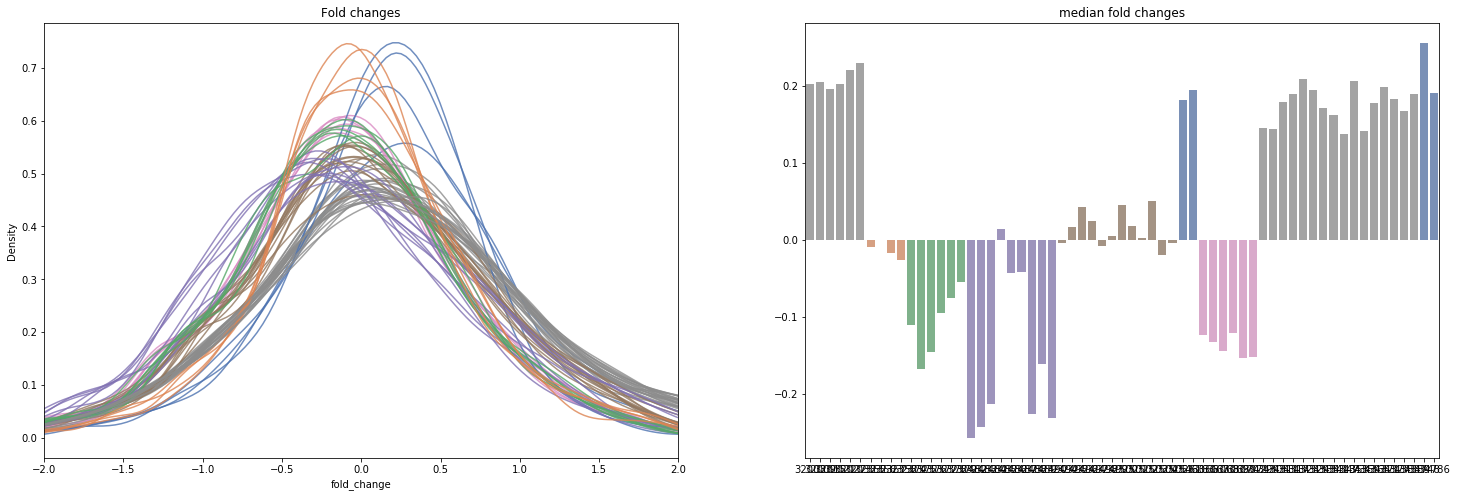

In [64]:
plot_fc(filtered_hela_nsaf.fillna(0.0), ref = 32416, plot_med_fc = True, color_scheme=list(cols_[~cols_.index.isin([32416])]))

2 aspects can be appreciated:
1. Systematic differences in the quantification levels are visible
2. Consequently, the median fold change between proteins of the HeLa samples are shifted

Possibly, this could be corrected by subtracting the median NSAF value to every protein in the sample and dividing by the standard deviation

In [108]:
med_std = pd.DataFrame()

def calc_median(row):
    values = row[row!=0]
    return np.median(values)

med_std['median'] = np.log2(filtered_hela_nsaf).fillna(0).apply(lambda x: calc_median(x), axis =1)
med_std['std'] = np.log2(filtered_hela_nsaf).apply(lambda x: np.std(x), axis =1)

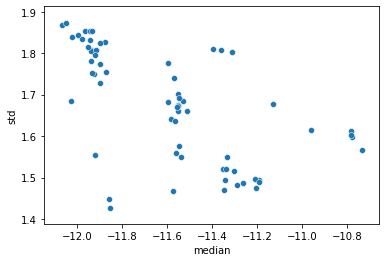

In [109]:
sns.scatterplot(data=med_std, x='median', y="std")

In [110]:
def scale_sample(row):
    median, std = med_std.loc[row.name,:]
    return (row-median)/std

In [111]:
scaled_hela_nsaf = filtered_log_hela_nsaf.apply(lambda x: scale_sample(x), axis = 1)

In [112]:
filtered_scaled_hela_nsaf = scaled_hela_nsaf.loc[:,reoccurring]

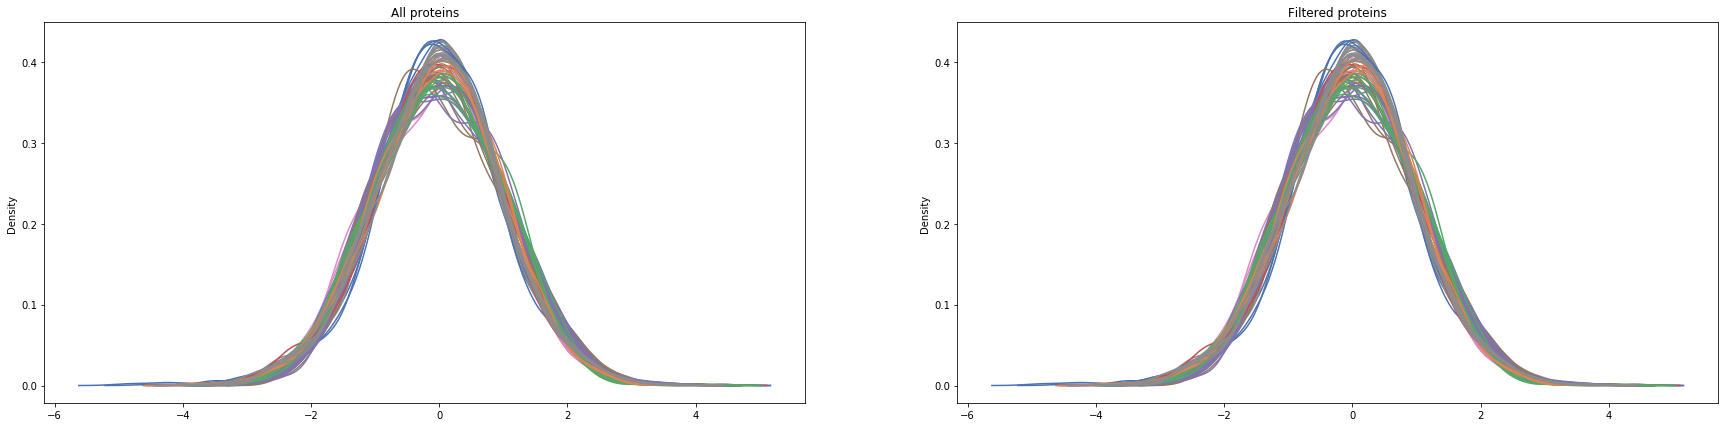

In [113]:
# Plotting the abundance values of the full and the filtered dataset
fig, ax = plt.subplots(1,2,figsize=(30,7))

ax[0].set_title('All proteins')
sns.kdeplot(data=scaled_hela_nsaf.transpose(), palette = list(hela_meta.PXD_accession.apply(lambda x: lut[x]).sort_index()), legend = False, common_norm=False, ax =ax[0])

ax[1].set_title("Filtered proteins")
sns.kdeplot(data=filtered_scaled_hela_nsaf.transpose(), palette = list(hela_meta.PXD_accession.apply(lambda x: lut[x]).sort_index()), legend = False, common_norm=False, ax =ax[1])